# Regression with an Abalone Dataset
Run after following notebooks are run:
1. **01 Data Cleaning**

## Development Notes/Ideas

## Libraries

In [1]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Used for Cramer's V computation

## Load Data

In [2]:
train = pd.read_pickle('train_clean.pkl')

## Univariate Analysis
First, we look at the distribution of the target variable: Rings
- Normal distribution, right skewed

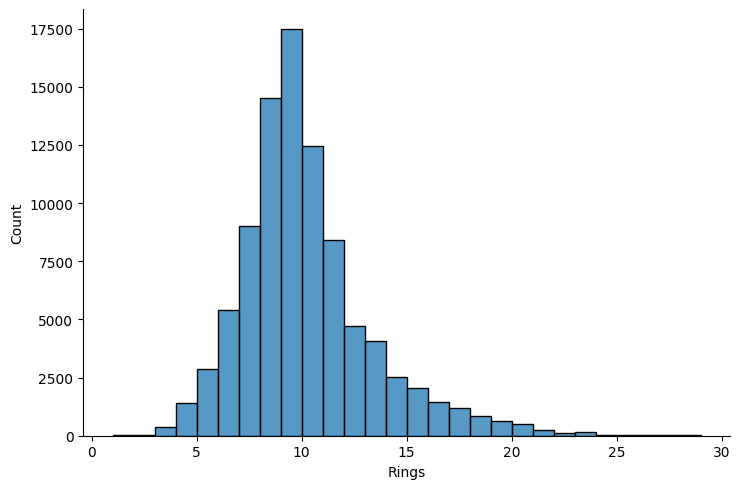

In [15]:
## histogram of Rings
g=sns.displot(data=train, x='Rings', binwidth=1, aspect=1.5)